In [13]:
import numpy as np
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
from statsmodels.stats.power import tt_ind_solve_power
import scipy.stats as stats
import math
import pandas as pd
import statsmodels.api as sm
from itertools import combinations 
import seaborn as sns

sns.set_theme()

In [2]:
cars = pd.read_csv('data/car_data.csv')

In [3]:
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [17]:
cars_mpg_weight = cars[['mpg', 'weight']]

In [10]:
cars_mpg_weight.mean()
corr = cars_mpg_weight.corr()

In [16]:
corr

,mpg,weight
mpg,1.000000,-0.831741
weight,-0.831741,1.000000


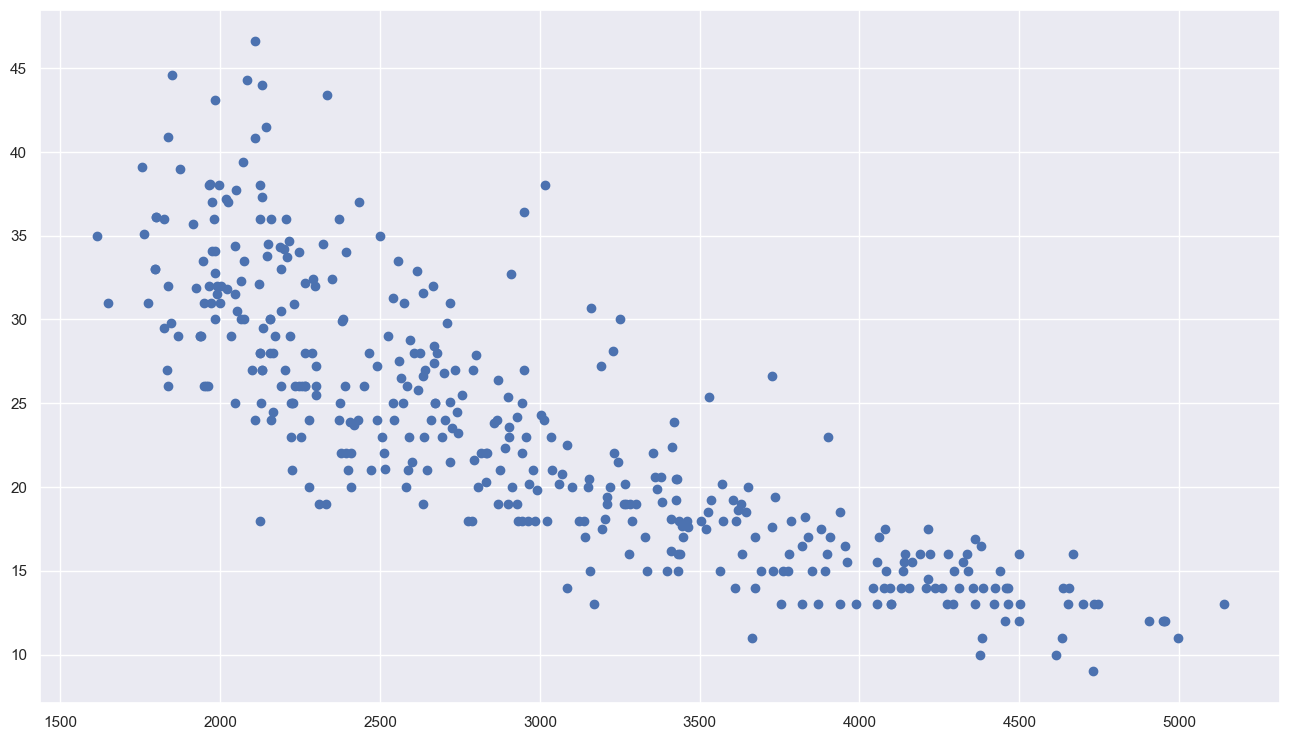

In [29]:
fig, ax = plt.subplots(figsize= (16, 9))
plt.scatter(cars_mpg_weight['weight'], cars_mpg_weight['mpg'])

<Axes: >

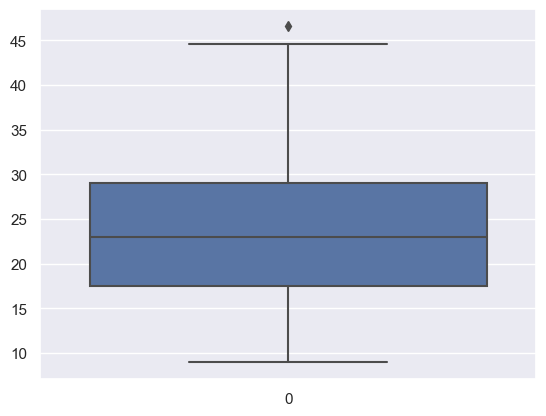

In [32]:
sns.boxplot(cars_mpg_weight['mpg'])


<Axes: >

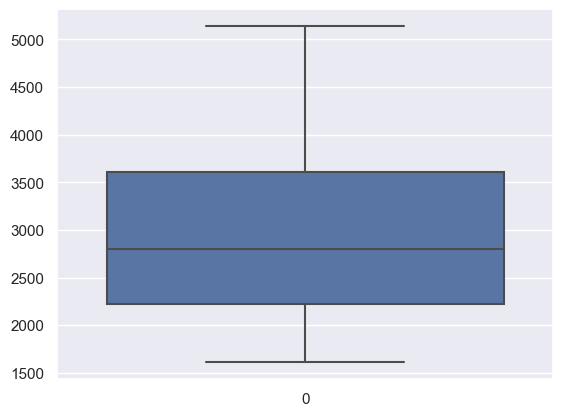

In [33]:
sns.boxplot(cars_mpg_weight['weight'])

<Axes: xlabel='mpg', ylabel='Count'>

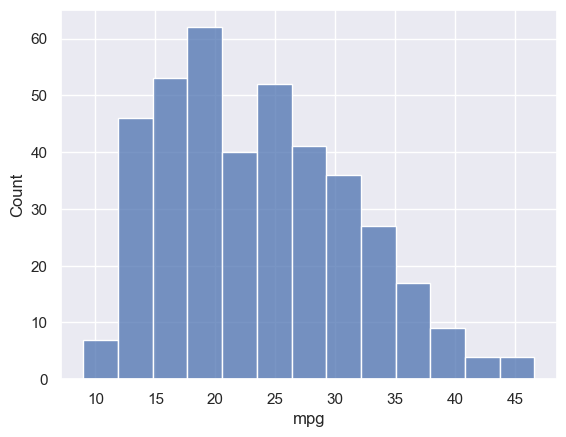

In [19]:
sns.histplot(cars_mpg_weight['mpg'])

<Axes: xlabel='weight', ylabel='Count'>

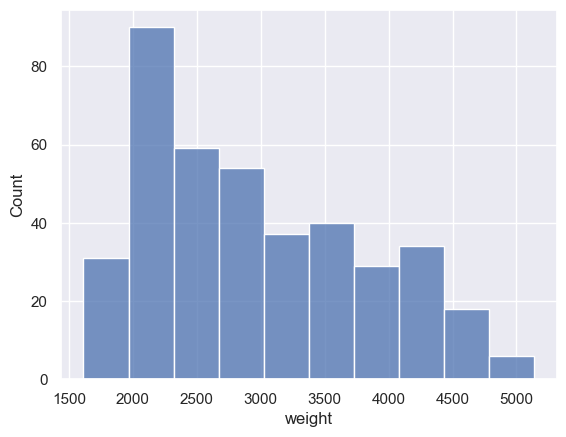

In [20]:
sns.histplot(cars_mpg_weight['weight'])

In [34]:
sns.(corr)

TypeError: 'module' object is not callable

In [25]:
alpha = .05
weight_mean = cars_mpg_weight['weight'].mean()
weight_std = cars_mpg_weight['weight'].std(ddof=1)
mpg_mean = cars_mpg_weight['mpg'].mean()
mpg_mean = cars_mpg_weight['mpg'].std(ddof=1)

In [26]:
t = stats.ttest_ind(cars_mpg_weight['mpg'], cars_mpg_weight['weight'],
    equal_var=False, # Welch's
    alternative='two-sided')

In [27]:
t

TtestResult(statistic=-69.42048534934622, pvalue=3.6317583378490467e-224, df=397.06763684023593)